In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import gymnasium as gym
import matplotlib
import windy
from sarsa import sarsa
from utils import run_episode
from plot import plot_windy_results, plot_2d_animated_heatmap
from mc import monte_carlo_control_eps_soft
import plotly.express as px
import numpy as np
import pandas as pd
from compiled.utils import q_to_2d_v
matplotlib.rcParams['figure.figsize'] = [8, 8]

In [4]:
env = gym.make('WindyGridworld-v0', king=True)

In [5]:
q_mc, policy_mc, history_mc = monte_carlo_control_eps_soft(env, 500, eps=0.5, alpha=None, gamma=0.9, return_history=True)
q_sarsa, policy_sarsa, history_sarsa = sarsa(env, 500, eps0=0.5, alpha=0.5, gamma=0.9, return_history=True)

n_steps_df = pd.DataFrame([[np.log(len(h)) for h in history_sarsa['rewards']],
                           [np.log(len(h)) for h in history_mc['rewards']]], index=['sarsa n steps', 'mc n steps']).T
n_steps_df = (n_steps_df
              .assign(**{'sarsa mean n steps': lambda df: df['sarsa n steps'].rolling(10, min_periods=1).mean()})
              .assign(**{'mc mean n steps': lambda df: df['mc n steps'].rolling(10, min_periods=1).mean()}))

fig = px.line(n_steps_df, color_discrete_sequence=['gray', 'gray', 'blue', 'yellow'])
fig.update_layout(xaxis_title='episode', yaxis_title='log(n of steps)', showlegend=True)

  0%|          | 0/500 [00:00<?, ?it/s]C:\Users\sam24\.conda\envs\rl\lib\site-packages\gymnasium\utils\passive_env_checker.py:218: UserWarning:

WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`

100%|██████████| 500/500 [00:01<00:00, 459.62it/s]


In [6]:
def plot_sarsa_runs(var_name, values, sarsa_kwargs):
    history = [sarsa(**(sarsa_kwargs | dict({var_name: v, 'return_history': True})))[2] for v in values]
    n_steps_df = pd.DataFrame([[np.log(len(h)) for h in history_sarsa['rewards']] for history_sarsa in history],
                              index=['sarsa {}={:.2f}'.format(var_name, v) for v in values]).T
    n_steps_df = n_steps_df.rolling(10, axis=0, min_periods=1).mean()

    fig = px.line(n_steps_df)
    fig.update_layout(xaxis_title='episode', yaxis_title='log(n of steps)', showlegend=True)
    fig.show()

In [7]:
kwargs = dict(env=env, num_episodes=500, eps0=0.5, alpha=0.5, gamma=0.9, return_history=True, decaying_eps=True)

var_name = 'gamma'
values = np.arange(0.2, 1.2, step=0.2)
plot_sarsa_runs(var_name, values, kwargs)

100%|██████████| 500/500 [00:01<00:00, 324.37it/s]


In [8]:
kwargs = dict(env=env, num_episodes=500, eps0=0.5, alpha=0.5, gamma=0.9, return_history=True, decaying_eps=True)

var_name = 'alpha'
values = np.arange(0.2, 1.2, step=0.2)
plot_sarsa_runs(var_name, values, kwargs)

100%|██████████| 500/500 [00:01<00:00, 452.93it/s]


In [14]:
kwargs = dict(env=env, num_episodes=500, eps0=0.05, alpha=0.5, gamma=0.9, return_history=True, decaying_eps=True)

var_name = 'decaying_eps'
values = [True, False]
plot_sarsa_runs(var_name, values, kwargs)

100%|██████████| 500/500 [00:01<00:00, 386.60it/s]


In [10]:
kwargs = dict(env=env, num_episodes=500, eps0=0.5, alpha=0.5, gamma=0.9, return_history=True, decaying_eps=False)

var_name = 'eps0'
values = np.arange(0.05, 0.3, step=0.05)
plot_sarsa_runs(var_name, values, kwargs)

100%|██████████| 500/500 [00:02<00:00, 219.38it/s]


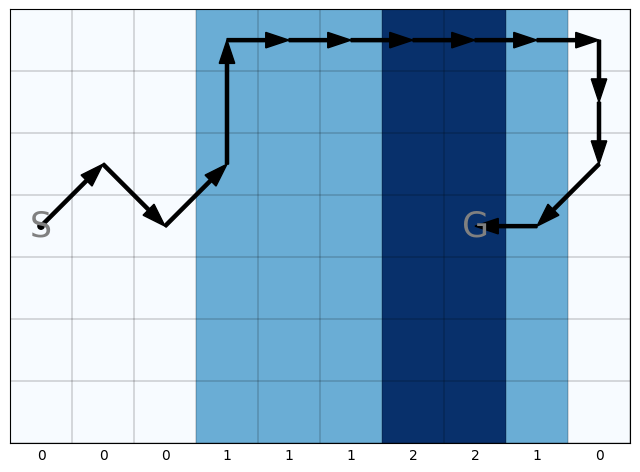

Episode length = 14


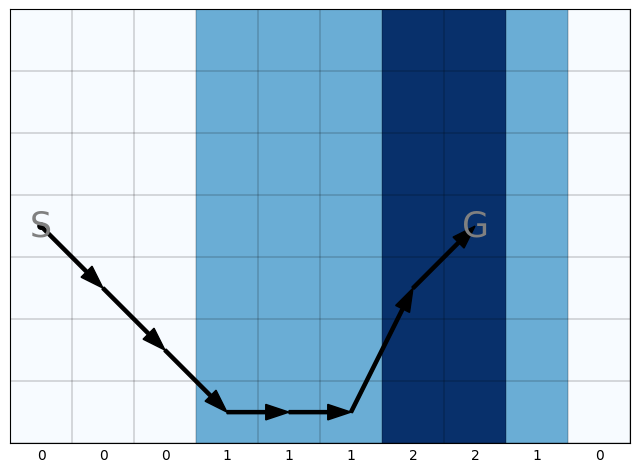

Episode length = 7


In [17]:
rewards = run_episode(env, policy_mc, render=True)
print(f"Episode length = {len(rewards[2])}")
rewards = run_episode(env, policy_sarsa, render=True)
print(f"Episode length = {len(rewards[2])}")